#              CISC-873-DM-F22-A3
#              Fake Reddit Prediction ⚡

## Problem Formulation
#### What is the input?

The input:

Training dat (data) : it containd the features and the label data.

Testing data (test) : it contains the features.

#### What is the output?
The output is the label that specify if the post in Reddit is fack or not

label contain the prediction of the probability (0-1, float)

#### What data mining function is required?

As I understand from this part of the slide

Data Mining Functions
1. Generalization and Summarization
2. Association and Correlation
3. Classification & Prediction
4. Clustering
5. Outlier/Anomaly Analysis
6. Time and Ordering 
7. Structure and Network Analysis

The data mining in this problem requires Classification & Prediction After cleaning the data by:

handeling any missing data
removing duplications
removing useless data (sach as text that contain very low number of characters)
using the regular expression library (re)


#### What could be the challenges?
The Challenges represented in:

Missing data
Noise data (sach as text that contain very low number of characters)
Dealing with text feature by preprocessing and preparing it before building the models
label that contain values out of 0 and 1

#### What is the impact?

the impact that the model will fits will on the training data and predect well on the test data or any data that we enter, And that will have a huge impact in real life if that uesd we will be able to predect right and proratize what is important.
we are going to be able to evaluate our models correctly and we can help the customer to find what they really want.

#### Ideal solution

the ideal solution happens when our model is able to classify and predict very well on any data the model gets , And also that happens when our data is cleaned perfectly and
it happens when choose the perfect model who can deals with type of dat and not to forget the hyperparameter tuning .
The highest accuracy i got on kaggle was 0.88481 by using random forest classifier


In [ ]:
#importing the required libraries 📚
import time
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns

from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

import string

from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
# Machine Learning libraries
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Miscellanous libraries
from collections import Counter

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Deep learning libraries
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM , GRU
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelBinarizer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit
     

In [ ]:
#Reading our train set 🙌
df = pd.read_csv("xy_train.csv")  
#Reading our test set 
df1 = pd.read_csv("x_test.csv")  
#printing our train set 
df.head()

,id,text,label
0,265723,A group of friends began to volunteer at a hom...,0
1,284269,British Prime Minister @Theresa_May on Nerve A...,0
2,207715,"In 1961, Goodyear released a kit that allows P...",0
3,551106,"Happy Birthday, Bob Barker! The Price Is Right...",0
4,8584,"Obama to Nation: 聙""Innocent Cops and Unarmed Y...",0


In [ ]:
df.text[5]

'In the 1920鈥檚, Hitler was forbidden to address public meetings in much of Germany, a major blow to the Nazis. This poster, by cartoonist Philipp Rupprecht (most known for his cartoons for Julius Streicher鈥檚 Der St眉rmer) says: "He alone of two billion people on earth may not speak in Germany.鈥?\t0.96\t0\t1\t5\nPu-Chi-Mao\tbelgium and german politicians\t1552565691.0\ti.redd.it\tTrue\tb0zm11\thttps://preview.redd.it/mnxxgk6et2m21.jpg?width=320&crop=smart&auto=webp&s=91030f3ea454b81ca7f383cc2087f93ae486b7a3\t\t6.0\t10\tphotoshopbattles\tPsBattle: Belgium and German Politicians\t0.82\t1\t0\t0\nglm73\tpenny wallpaper\t1560276166.0\ti.redd.it\tTrue\tbzfwpl\thttps://preview.redd.it/d10ees5lor331.jpg?width=320&crop=smart&auto=webp&s=48f1b6b5643a9ec1cbcfa36d9968c9bf1ab4f4fa\t\t6.0\t16\tmildlyinteresting\tPenny wallpaper\t0.87\t1\t0\t0\nnoisycricket\tball tall\t1392789303.0\t\tTrue\tcfj0vv0\thttp://i.imgur.com/VKgyIc4.jpg\t1ybecg\t\t139\tpsbattle_artwork\tBall Tall.\t\t0\t2\t4\nsnlisha\ttrump l

### Data Exploration

In [ ]:
#display the data shape🤓
df.shape

(60000, 3)

In [ ]:
#display data columns🤓
df.columns

Index(['id', 'text', 'label'], dtype='object')

In [ ]:
# show the information of the train dataset🤓
df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      60000 non-null  int64 
 1   text    60000 non-null  object
 2   label   60000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ MB


In [ ]:
#display data statistical summary👀 
df.describe()

,id,label
count,60000.000000,60000.000000
mean,280243.619717,0.467667
std,162623.600284,0.506648
min,0.000000,0.000000
25%,138541.250000,0.000000
50%,279910.500000,0.000000
75%,421243.250000,1.000000
max,562695.000000,2.000000


In [ ]:
#display data categorical summary👀 
df.describe(include='O')

,text
count,60000
unique,59645
top,/r/Fakehistoryporn subscribers as they attempt...
freq,14


Data Cleaning and Preprocessing

In [ ]:
#checking null values😱
print('The null values are equal to: ',df.isnull().sum().sum())

The null values are equal to:  0


In [ ]:
#check if there is duplicated in data😱
# check nan value
print('The duplicated values are equal to: ',df.duplicated().sum())

The duplicated values are equal to:  0


In [ ]:
# Drop rows that contain label = 2 
df = df[(df["label"] != 2)]

In [ ]:
# drop the id column as it isn't a feature👻
df = df.drop(columns=['id'])

In [ ]:
# save the id of test data to use it in save the result🙌
test_id = df1['id']

# drop the id column as it isn't a feature
test = df1.drop(columns=['id'])
     

Visualization

In [ ]:
#display label categories & their counts😀
df.label.value_counts()

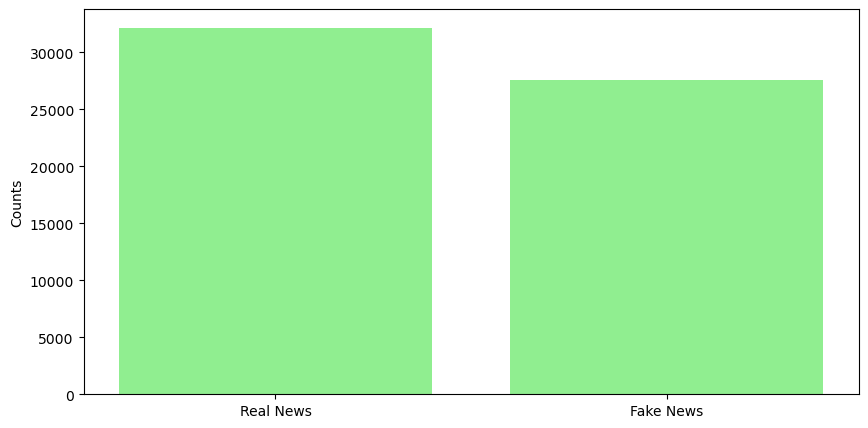

In [ ]:
#visualising the Real News and Fake News from label column😀
Real_news = df[df["label"]==0].values
fake_news = df[df["label"]==1].values
plt.bar(0,height=len(Real_news),color ='lightgreen')
plt.bar(1,height=len(fake_news),color ='lightgreen')
plt.xticks([0,1],["Real News","Fake News"])
plt.ylabel("Counts")
plt.show()

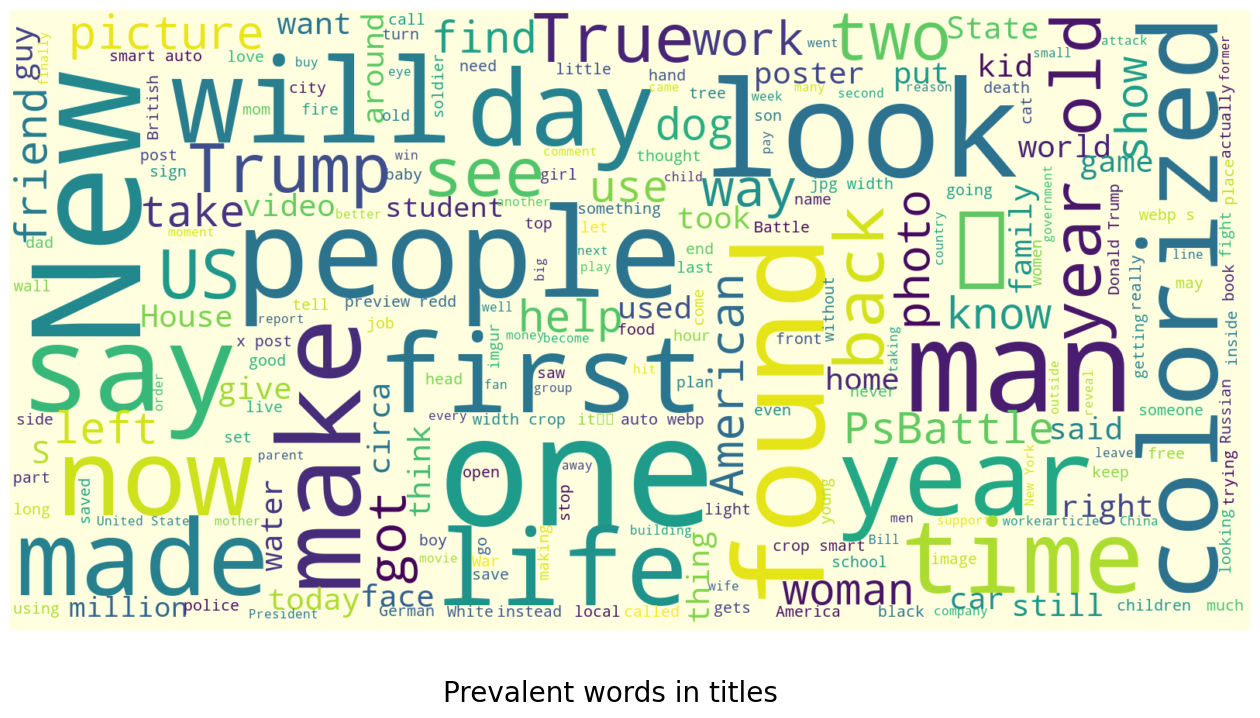

In [ ]:
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="lightyellow").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()
show_wordcloud(df['text'], title = 'Prevalent words in titles')    

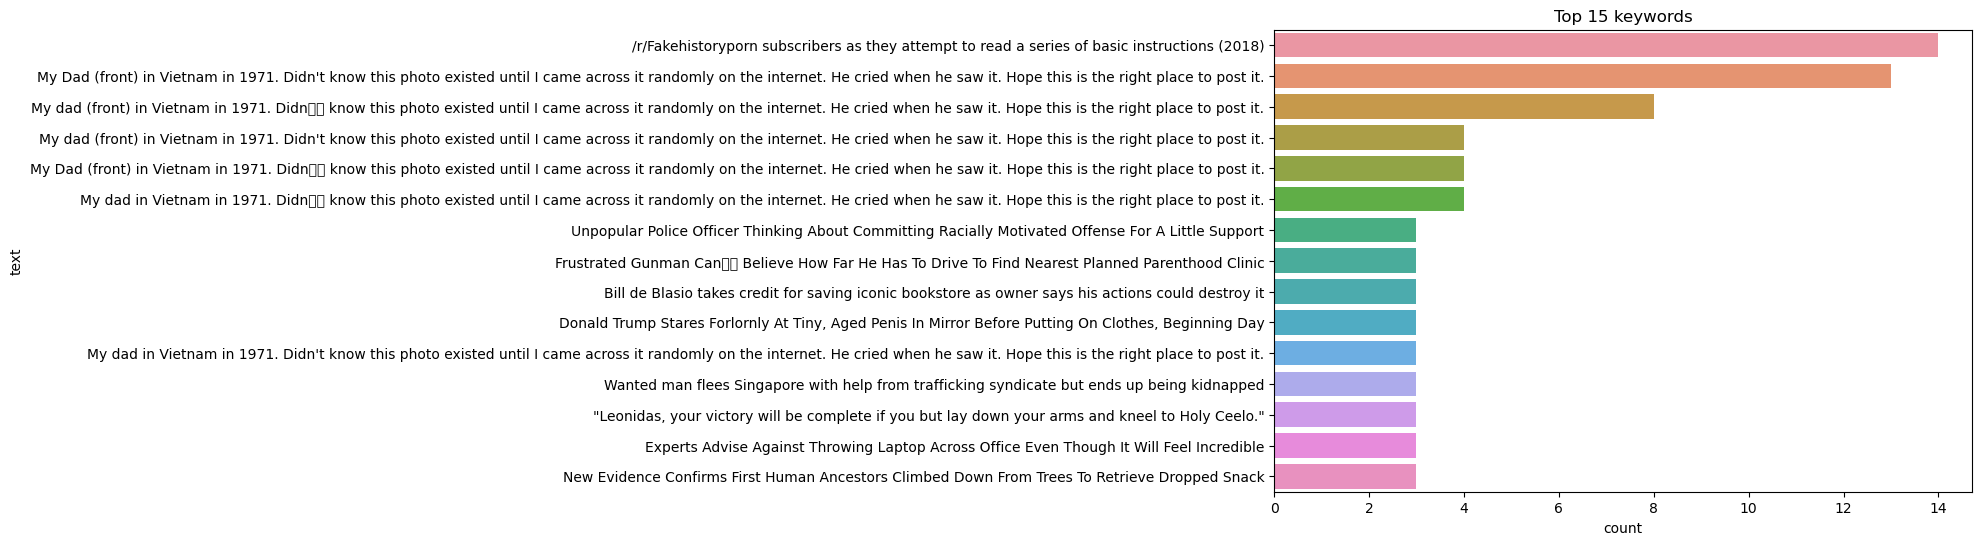

In [ ]:
# Most common keywords
plt.figure(figsize=(9,6))
sns.countplot(y=df.text, order = df.text.value_counts().iloc[:15].index)
plt.title('Top 15 keywords')
plt.show()
#df.text.value_counts().head(10)

In [ ]:
import plotly
import plotly_express as px

fig = px.histogram(df.head(500), x='text', color='label', histfunc='count')
fig.update_layout(
    title='text (first 500 rows) histogram', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [ ]:
import plotly.express as px
fig = px.density_heatmap(df, x='label')
fig.update_layout(
    title='label density heatmap', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [ ]:
from bokeh.models import NumeralTickFormatter
# Word Frequency of most common words
word_freq = pd.Series(" ".join(df["text"]).split()).value_counts()
# list most uncommon words
word_freq[-10:].reset_index(name="freq")

,index,freq
0,Suebi鈥檚,1
1,Ariovistus,1
2,"11/9,""",1
3,"""Fahrenheit",1
4,Fonzie,1
5,"backlash""",1
6,Backfire,1
7,used...,1
8,Eritrea],1
9,"Tapes,鈥?a",1




### The regex tokenizer:🔠

It is used here separates the words of a contiguous string into a list consisting of words only. "\w+" means that all word characters contiguous are turned into a list element.The regex tokenizer used here separates the words of a contiguous string into a list consisting of words only. "\w+" means that all word characters contiguous are turned into a list element. 
https://towardsdatascience.com/dynamic-word-tokenization-with-regex-tokenizer-801ae839d1cd







## Data preprocessing part 1
## Steps 
### 1) importing Natural Language Toolkit (NLTK)📚

NLTK is an essential library supports tasks such as classification, stemming, tagging, parsing, semantic reasoning, and tokenization in Python. It's basically your main tool for natural language processing and machine learning. Today it serves as an educational foundation for Python developers who are dipping their toes in this field (and machine learning).

### 2)Stopwords:🚫
They are words with no specific meaning like "a", "the", or "by". It is important to remove them for text mining, but not for NLP. For neural networks that process sentences sequentially, such as 1D-CNN or RNN, stopwords are an important indicator of context.

### 3)Assign (for_embedding=False)❌

### 4)Cleaning 🧹
Remove any leter does not english character, Remove any more than one space,Remove web tag,Replace any single character with a single space, Replace any more than one space with a single space,

### 5)tokenization 
 split the sentence into words then
 Convert all letters to small letters

### 6)word Filtering Stemming.🔁
Stemming is a set of algorithms for determining the root of words. For example, the root of the words "paint", "painted", "painting" is the same. However, since algorithms are used, incorrect word stems can also be calculated. It is not uncommon to get results like "peopl" for "peoples" or "poeple". Depending on the algorithm, the stemming can also become too strong because too much is taken away from the word. In this case we talk about overstemming.

### 7)Feature creation with TF-IDF:🤩
The concept TF-IDF stands for term frequency-inverse document frequency. This is in the field of numerical statistics. With this concept, we will be able to decide how important a word is to a given document in the present dataset or corpus. TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document) IDF(t) = log10(Total number of documents / Number of documents with term t in it). Hence, equation is calculate TF-IDF is as follows.

TF * IDF = [ (Number of times term t appears in a document) / (Total number of terms in the document) ] * log10(Total number of documents / Number of documents with term t in it).

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
# It is the method used to return the word to its original form
stemmer = SnowballStemmer("english")   
stop_words = set(stopwords.words("english")) # It is the method of producing a stop words

def clean_text(text, for_embedding=False):
    """ steps:
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    # IGNORECASE : is a flag allows for case-insensitive matching of the Regular Expression with the given string
     # Remove any more than one space
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
   # Remove web tags
    RE_TAGS = re.compile(r"<[^>]+>") 
    # Remove any leter does not english character
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE) 
    # Remove any single character
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE) 
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)
    # Replace any tag with a single space.
    text = re.sub(RE_TAGS, " ", text)
    # Replace any non english character with a single space.
    text = re.sub(RE_ASCII, " ", text)
    # Replace any single character with a single space.
    text = re.sub(RE_SINGLECHAR, " ", text)
    # Replace any more than one space with a single space.
    text = re.sub(RE_WSPACE, " ", text)  
   
    # split the sentence into words
    word_tokens = word_tokenize(text) 
    # Convert all letters to small letters
    words_tokens_lower = [word.lower() for word in word_tokens] 

    # words_filtered (Words can be filtered based on how many times they appear)
    # stemmer used to return the word to its original form.
    words_filtered = [
        stemmer.stem(word) for word in words_tokens_lower if word not in stop_words
    ]

    # Join all words in text_clean and separate them by space.
    text_clean = " ".join(words_filtered)
    return text_clean
     

    text_clean = " ".join(words_filtered)
    return text_clean
     

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# call clean_text function that take string as a parameter to test the function
clean_text("cared fairly sportingly singing programming .")

'care fair sport sing program'

In [ ]:
%%time
# Clean text
df["text_clean"] = df.loc[df["text"].str.len() > 20, "text"]
df["text_clean"] = df["text_clean"].map(
    lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x
)
     
df.head()

CPU times: user 24.6 s, sys: 0 ns, total: 24.6 s
Wall time: 24.6 s


,text,label,text_clean
0,A group of friends began to volunteer at a hom...,0,group friend began volunt homeless shelter nei...
1,British Prime Minister @Theresa_May on Nerve A...,0,british prime minist theresa may nerv attack f...
2,"In 1961, Goodyear released a kit that allows P...",0,goodyear releas kit allow ps brought heel http...
3,"Happy Birthday, Bob Barker! The Price Is Right...",0,happi birthday bob barker price right host lik...
4,"Obama to Nation: 聙""Innocent Cops and Unarmed Y...",0,obama nation innoc cop unarm young black men d...


### Feature creation with TF-IDF (word vectorizer)

In [ ]:
"""
Compute unique word vector with frequencies
exclude very uncommon (<10 obsv.) and common (>=30%) words
use pairs of two words (ngram)
"""
#CountVectorizer is a method to convert text to numerical data - a matrix of token counts
word_vectorizer = TfidfVectorizer(
    analyzer="word", max_df=0.3, min_df=10, ngram_range=(1, 2), norm="l2"
)
word_vectorizer.fit(df["text_clean"])

TfidfVectorizer(max_df=0.3, min_df=10, ngram_range=(1, 2))

####  N-Grams  🎨
Go back to the TOP

Here we look at the frequency of certain word combinations in the context of each other.

Let's look at the sentence "I am a Data Scientist". If we use a 2-Gram, then the sentence would be transformed into:

"I am", "am a", "a Data", "Data Scientist".

analogously, there would also be 3-Grams:

"I am a", "am a Data", "a Data Scientist".

Now we look how often the same word combinations occur in the whole text.

In [ ]:
#printing out Unique word ngram vector 
word_vector = pd.Series(word_vectorizer.vocabulary_).sample(5, random_state=1)
print(f"Unique word (ngram) vector extract:\n\n {word_vector}")

Unique word (ngram) vector extract:

 eli       2666
go far    3595
bamboo     650
wisdom    9837
pocket    6705
dtype: int64


### Feature creation with TF-IDF (character vectorizer) ✍

In [ ]:
"""
Compute unique word vector with frequencies
exclude very uncommon (<10 obsv.) and common (>=30%) words
use pairs of two words (ngram)
"""
char_vectorizer = TfidfVectorizer(
    analyzer="char", max_df=0.3, min_df=10, ngram_range=(1, 2), norm="l2"
)
char_vectorizer.fit(df["text_clean"])
     

TfidfVectorizer(analyzer='char', max_df=0.3, min_df=10, ngram_range=(1, 2))

In [ ]:
# Vector representation of vocabulary
#printing out Char word ngram vector 
char_vector = pd.Series(char_vectorizer.vocabulary_).sample(5, random_state=1)
print(f"Unique char (ngram) vector extract:\n\n {char_vector}")

Unique char (ngram) vector extract:

 xv    611
uv    529
bb     37
vn    548
ru    452
dtype: int64


In [ ]:
#Checking missing values
def missing_values(df):
    missing=pd.DataFrame(df.isnull().sum()/len(df))*100
    missing.columns = ['missing_values(%)']
    missing['missing_values(numbers)'] = pd.DataFrame(df.isnull().sum())
    return missing.sort_values(by='missing_values(%)', ascending=False)
missing_values(df)
     

,missing_values(%),missing_values(numbers)
text,0.0,0
label,0.0,0
text_clean,0.0,0


### Spliting data

In [ ]:
# split the train data to features and lable column
x = df["text_clean"]
y = df["label"] 
test=df1['text']


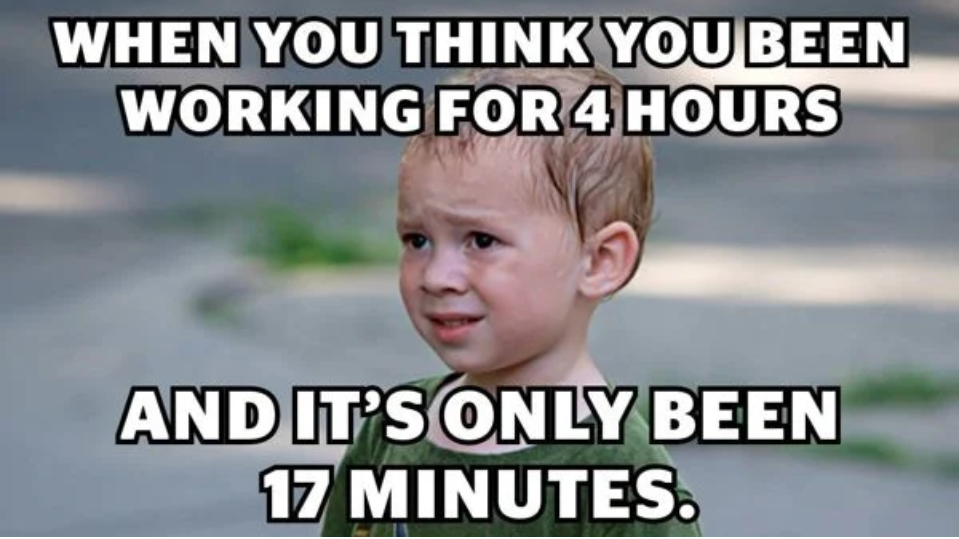

### Modeling
MLPClassifier with word-level vectorizer
thoughts and observations for trial 0, plan for trial 1:

### Trial 1
Use pipeline with GridSearch, validation set and logistic regression model with word-level vectorizer.

Using grid search in a a machine learning model is always helpful in choosing the best parameters for use. However this could be time-consuming. Such search shows

In [ ]:
#Declaring id value for later use in our submission
id=df1.id

Logistic regression is a supervised learning algorithm used to classify texts and predict the probability that a given input belongs to one of the output categories. This algorithm is effective in automatically classifying the language of a text or the field to which it belongs 

In [ ]:
# Further split the original training set to a train and a validation set
X_train, X_val, y_train, y_val = train_test_split(x, y, train_size = 0.8, stratify = y, random_state = 2022)
# Create a list where train data indices are -1 and validation data indices are 0
split_index = [-1 if i in X_train.index else 0 for i in x.index]
# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

#set vectorizer hyperparameters
pipe = Pipeline([('cvec', TfidfVectorizer(preprocessor=clean_text,analyzer="word", max_df=0.3, min_df=10, norm="l2")),    
                 ('lr', LogisticRegression(solver='sag'))])
# Tune GridSearchCV
pipe_params = {'cvec__ngram_range': [(1,1), (2,2), (1,3)],'lr__C': [0.01, 0.1,1], 'lr__penalty': ['l1', 'l2']}
gs = GridSearchCV(pipe, param_grid=pipe_params,  scoring="roc_auc", cv=pds)
#train model with gridsearchcv
gs.fit(x, y);
#predict best score and params
print("Train score", gs.score(x, y))
print("Best params:", gs.best_params_)
     

Train score 0.91623054318561
Best params: {'cvec__ngram_range': (1, 3), 'lr__C': 1, 'lr__penalty': 'l2'}


In [ ]:
#predict output and save submission
submission = pd.DataFrame()
submission['id'] = id
submission['label']=gs.predict_proba(test)[:,1]
submission.to_csv('sample_submission_walkthrough1.csv', index=False)
     

Result🎉

Logistic classifier using Grid Search CV analyzer is word

Accuracy in kaggle Public = 0.8324

Accuracy in kaggle Private =0.91623054318561

Best params: {'cvec__ngram_range': (1, 3), 'lr__C': 1, 'lr__penalty': 'l2'}

It gives a good accuracy but i will try MultinomialNB 

## Trial 2
Multinomial naive bayes fits to text classification. Multinomial naive bayes is typically used for multinomial event model like bag-of-words, which is a method to represent document as vector space by counting words. 

Naive Bayes classifier, which provides a nice baseline for this task. scikit-learn includes several variants of this classifier; the one most suitable for text is the multinomial variant.

To make the vectorizer => transformer => classifier easier to work with, we will use Pipeline class in Scilkit-Learn that behaves like a compound classifier.

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
#set vectorizer hyperparameters
pipe = Pipeline([('cvec', TfidfVectorizer(preprocessor=clean_text,analyzer="word", max_df=0.3, min_df=10, norm="l2")),    
                 ('nb', MultinomialNB())])
# Tune GridSearchCV
pipe_params = {'cvec__ngram_range': [(1,1), (2,2), (1,3)],
               'nb__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
gs1 = GridSearchCV(estimator=pipe, param_grid=pipe_params,  scoring="roc_auc", cv=pds)
#train model with gridsearchcv
gs1.fit(x, y);
#predict best score and params
print("Train score", gs1.score(x, y))
print("Best params:", gs1.best_params_)
     

Train score 0.8926708418307907
Best params: {'cvec__ngram_range': (1, 3), 'nb__alpha': 1}


In [ ]:
#predict output and save submission
submission = pd.DataFrame()
submission['id'] = df1['id']
submission['label']=gs1.predict_proba(test)[:,1]
submission.to_csv('sample_submission_walkthrough222.csv', index=False)

Result🎉

MultinomialNB classifier using Grid Search CV analyzer is word

Accuracy in kaggle Public =0.81934

Accuracy in kaggle Private =0.8926708418307907

Best params: {'cvec__ngram_range': (1, 3), 'nb__alpha': 1}

It gives a lower accuracy than the logistic classifier bec it need a bigger test sample size to give a good accuracy

### Trial 3
Model with randomForest, character-level vectorizer and GridSearch with validation set

RandomForest Classifier will give a better performance in a multioutput classification if the available training data is small.

In [ ]:
# Randomforest pipeline setup
rf_pipe = Pipeline([('tvec',  TfidfVectorizer(preprocessor=clean_text,analyzer="char", max_df=0.3, min_df=10, norm="l2")),
                    ('rf', RandomForestClassifier())])
# Setting up randomforest params
rf_params = {'tvec__max_features':[2000],'tvec__ngram_range': [(1, 2)],'tvec__stop_words': ['english'],
             'rf__max_depth': [1000],'rf__min_samples_split': [100],'rf__max_leaf_nodes': [None]}
             
rf_pipe.fit(x, y)
# Setting up GridSearch for TFIDFVectorizer
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_params, scoring="roc_auc", cv = pds, verbose = 1, n_jobs = -1)
# Fitting Randomforest CV GS
rf_gs.fit(x, y)
#predict best score
print("Train score", rf_gs.score(x, y))
print("Best params:", rf_gs.best_params_)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Train score 0.9842240268583182
Best params: {'rf__max_depth': 1000, 'rf__max_leaf_nodes': None, 'rf__min_samples_split': 100, 'tvec__max_features': 2000, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': 'english'}


In [ ]:
#predict output and save submission
submission = pd.DataFrame()
submission['id'] = df1['id']
submission['label']=rf_gs.predict_proba(test)[:,1]
submission.to_csv('sample_submission_walkthrough3.csv', index=False)

Result🎉

RandomForestClassifier using Grid Search CV analyzer is char

Accuracy in kaggle Public =0.76826

Accuracy in kaggle Private =0.9842240268583182

Best params: {'rf__max_depth': 1000, 'rf__max_leaf_nodes': None, 'rf__min_samples_split': 100, 'tvec__max_features': 2000, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': 'english'}

Random forest gives a better accuracy but it has an overfitting problem 

### Trial 4
XGBoost Model with bayesian search and word-level vectorizer with validation set



In [ ]:
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipline = Pipeline(steps=[('cvec', TfidfVectorizer(preprocessor=clean_text,analyzer="word", max_df=0.3, min_df=10, norm="l2")), 
                                 ('my_classifier', XGBClassifier(n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1))])
full_pipline.fit(x,y)
param_grid = {'cvec__ngram_range': [(1,1), (2,2), (1,3)],
             'my_classifier__max_depth':[5,10, 20, 30,40,50] }

grid_xg = GridSearchCV(full_pipline, param_grid=param_grid, scoring="roc_auc", cv = pds, verbose = 1, n_jobs = -1)
grid_xg.fit(x, y)
#predict best score
print('best score {}'.format(grid_xg.best_score_))
print('best score {}'.format(grid_xg.best_params_))

Fitting 1 folds for each of 18 candidates, totalling 18 fits
best score 0.8542766086161628
best score {'cvec__ngram_range': (1, 3), 'my_classifier__max_depth': 50}


In [ ]:
#predict output and save submission
submission = pd.DataFrame()
submission['id'] = df1['id']
submission['label']=grid_xg.predict_proba(test)[:,1]
submission.to_csv('sample_submission_walkthrough4.csv', index=False)

Result🎉

XGBClassifier using Grid Search CV analyzer is word

Accuracy in kaggle Public =0.81155

Accuracy in kaggle Private =0.8542766086161628

best score {'cvec__ngram_range': (1, 3), 'my_classifier__max_depth': 50}

It gives a lower accuracy than the logistic ,the XGBoost algorithm would not perform well when the dataset’s problem is not suited for its features.
More precisely, XGBoost would not work with a dataset with issues such as Natural Language Processing (NLP).

Trial 5

MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. 

MLP classifier with word level vectorizer and gridsearchcv

I expect in MLP the model will perform better and score will be the best

In [ ]:
full_pipline_5 = Pipeline(steps=[('cvec', TfidfVectorizer(preprocessor=clean_text,analyzer="word", max_df=0.3, min_df=10, norm="l2")), 
                                 ('my_classifier',MLPClassifier(random_state=1,solver="adam",
                                  hidden_layer_sizes=(224, 120, 12,),activation="relu",n_iter_no_change=10))])

param_grid_5 = {'cvec__ngram_range': [(1,1), (2,2), (1,3)]}
grid_mlp = GridSearchCV(full_pipline_5,param_grid_5,scoring="roc_auc", cv = pds, verbose = 1, n_jobs = -1)
grid_mlp.fit(x, y)
#predict best score
print('best score {}'.format(grid_mlp.best_score_))
print('best score {}'.format(grid_mlp.best_params_))
     

Fitting 1 folds for each of 3 candidates, totalling 3 fits
best score 0.8479329371882371
best score {'cvec__ngram_range': (1, 3)}


In [ ]:
#predict output and save submission
submission = pd.DataFrame()
submission['id'] = df1['id']
submission['label']=grid_mlp.predict_proba(test)[:,1]
submission.to_csv('sample_submission_walkthrough5.csv', index=False)

Result🎉

MLPClassifier using Grid Search CV analyzer is word

Accuracy in kaggle Public =0.79906

Accuracy in kaggle Private = 0.8479329371882371

best score {'cvec__ngram_range': (1, 3)}

it gives a lower acccuracy than logistic

# Second Trial

## Steps 
### 1) importing Natural Language Toolkit (NLTK)📚

NLTK is an essential library supports tasks such as classification, stemming, tagging, parsing, semantic reasoning, and tokenization in Python. It's basically your main tool for natural language processing and machine learning. Today it serves as an educational foundation for Python developers who are dipping their toes in this field (and machine learning).

### 2) Dropping out the duplicates 🧹

### 2)Stopwords🚫
They are words with no specific meaning like "a", "the", or "by". It is important to remove them for text mining, but not for NLP. For neural networks that process sentences sequentially, such as 1D-CNN or RNN, stopwords are an important indicator of context.

### 3)Assign (for_embedding=True)✅
What word embeddings do:convert word to vectors.
Why we need these embedding vectors: so that a machine can do amazing things; calculating the similarity between words is one of them.


### 4)Cleaning 🧹
Remove any leter does not english character, Remove any more than one space,Remove web tag,Replace any single character with a single space, Replace any more than one space with a single space,

### 5)tokenization 
 split the sentence into words then
 Convert all letters to small letters

### 6)word Filtering lemmatization:🔁

Lemmatization is the process of grouping together different inflected forms of the same word. It's used in computational linguistics, natural language processing (NLP) and chatbots.

### 7)Feature creation with TF-IDF:🤩
The concept TF-IDF stands for term frequency-inverse document frequency. This is in the field of numerical statistics. With this concept, we will be able to decide how important a word is to a given document in the present dataset or corpus. TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document) IDF(t) = log10(Total number of documents / Number of documents with term t in it). Hence, equation is calculate TF-IDF is as follows.

TF * IDF = [ (Number of times term t appears in a document) / (Total number of terms in the document) ] * log10(Total number of documents / Number of documents with term t in it).




In [ ]:
#lets drop duplicates (if any)
df.drop_duplicates(inplace=True)
x_train_text_FS = df.text
y_train_label_FS = df.label

In [ ]:
RF_tfidf_pipe_T2 = Pipeline([("tfidf", TfidfVectorizer(ngram_range=(1,3),analyzer="char")), ('RandomForestClassifier', RandomForestClassifier())])
#fit the model and print the score the model
RF_tfidf_pipe_T2.fit(x_train_text_FS, y_train_label_FS)  
     

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('RandomForestClassifier', RandomForestClassifier())])

In [ ]:
#predict output and save submission
submission = pd.DataFrame()
submission['id'] = df1['id']
submission['label']=RF_tfidf_pipe_T2.predict_proba(test)[:,1]
submission.to_csv('sample_submission_walkthrough7.csv', index=False)

Result🎉

RandomForestClassifier analyzer is char

Accuracy in kaggle Public =0.88481

best score {'cvec__ngram_range': (1, 3)}

This is my best score

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text,for_embedding=True):
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    #RE_TWOCHARACTER=re.compile(r"\b[A-Za-zÀ-ž]\b{2}", re.IGNORECASE)
    #RE_URL=re.compile(r'^https?:\/\/.*[\r\n]*', re.IGNORECASE)
    
   # remove any html tags (< /br> often found)
    text = re.sub(RE_TAGS, " ", text)
    #Keep only ASCII + European Chars and whitespace, no digits
    text = re.sub(RE_ASCII, " ", text)
    #remove single letter chars
    text = re.sub(RE_SINGLECHAR, " ", text)
     #remove two letter chars
    #text = re.sub(RE_TWOCHARACTER, " ", text)
    #remove URL 
    #text = re.sub(RE_URL, " ", text)
    #convert all whitespaces (tabs etc.) to single wspace
    text = re.sub(RE_WSPACE, " ", text)
    #remove any digit
    text=re.sub(r'\d+', '', text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    
    # (tdf-idf):
    # - remove stopwords, punctuation and stemm
    words_filtered = [
           lemmatizer.lemmatize(word) for word in words_tokens_lower if word not in stop_words
        ]

    text_clean = " ".join(words_filtered)
    return text_clean

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df["text_clean"] = df.loc[df["text"].str.len() > 20, "text"]
df["text_clean"] = df["text_clean"].map(
    lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x
)
     
df.head()

,text,label,text_clean
0,A group of friends began to volunteer at a hom...,0,group friend began volunteer homeless shelter ...
1,British Prime Minister @Theresa_May on Nerve A...,0,british prime minister theresa may nerve attac...
2,"In 1961, Goodyear released a kit that allows P...",0,goodyear released kit allows p brought heel ht...
3,"Happy Birthday, Bob Barker! The Price Is Right...",0,happy birthday bob barker price right host lik...
4,"Obama to Nation: 聙""Innocent Cops and Unarmed Y...",0,obama nation innocent cop unarmed young black ...


Feature creation with TF-IDF (word vectorizer)

In [ ]:
"""
Compute unique word vector with frequencies
exclude very uncommon (<10 obsv.) and common (>=30%) words
use pairs of two words (ngram)
"""
#CountVectorizer is a method to convert text to numerical data - a matrix of token counts
word_vectorizer = TfidfVectorizer(
    analyzer="word", max_df=0.3, min_df=10, ngram_range=(1, 2), norm="l2"
)
word_vectorizer.fit(df["text_clean"])

TfidfVectorizer(max_df=0.3, min_df=10, ngram_range=(1, 2))

In [ ]:
word_vector = pd.Series(word_vectorizer.vocabulary_).sample(5, random_state=1)
print(f"Unique word (ngram) vector extract:\n\n {word_vector}")

Unique word (ngram) vector extract:

 convinces          2122
canadian prime     1388
jesse              5145
ton               10087
christmas eve      1698
dtype: int64


Feature creation with TF-IDF (character vectorizer) ✍

In [ ]:
"""
Compute unique word vector with frequencies
exclude very uncommon (<10 obsv.) and common (>=30%) words
use pairs of two words (ngram)
"""
char_vectorizer = TfidfVectorizer(
    analyzer="char", max_df=0.3, min_df=10, ngram_range=(1, 2), norm="l2"
)
char_vectorizer.fit(df["text_clean"])
     

TfidfVectorizer(analyzer='char', max_df=0.3, min_df=10, ngram_range=(1, 2))

In [ ]:
# Vector representation of vocabulary
#printing out Char word ngram vector 
char_vector = pd.Series(char_vectorizer.vocabulary_).sample(5, random_state=1)
print(f"Unique char (ngram) vector extract:\n\n {char_vector}")

Unique char (ngram) vector extract:

 jm    248
oo    369
eo    121
aw     31
wy    581
dtype: int64


In [ ]:
#Checking missing values
def missing_values(df):
    missing=pd.DataFrame(df.isnull().sum()/len(df))*100
    missing.columns = ['missing_values(%)']
    missing['missing_values(numbers)'] = pd.DataFrame(df.isnull().sum())
    return missing.sort_values(by='missing_values(%)', ascending=False)
missing_values(df)
     

,missing_values(%),missing_values(numbers)
text,0.0,0
label,0.0,0
text_clean,0.0,0


In [ ]:
#Declaring id value for later use in our submission
id=df1.id

In [ ]:
# split the train data to features and lable column
x = df["text_clean"]
y = df["label"] 
test=df1['text']

In [ ]:
# Further split the original training set to a train and a validation set
X_train, X_val, y_train, y_val = train_test_split(x, y, train_size = 0.8, stratify = y, random_state = 2022)
# Create a list where train data indices are -1 and validation data indices are 0
split_index = [-1 if i in X_train.index else 0 for i in x.index]
# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

#set vectorizer hyperparameters
pipe = Pipeline([('cvec', TfidfVectorizer(preprocessor=clean_text,analyzer="word", max_df=0.3, min_df=10, norm="l2")),    
                 ('lr', LogisticRegression(solver='sag'))])
# Tune GridSearchCV
pipe_params = {'cvec__ngram_range': [(1,1), (2,2), (1,3)],'lr__C': [0.01, 0.1,1], 'lr__penalty': ['l1', 'l2']}
gs = GridSearchCV(pipe, param_grid=pipe_params,  scoring="roc_auc", cv=pds)
#train model with gridsearchcv
gs.fit(x, y);
#predict best score and params
print("Train score", gs.score(x, y))
print("Best params:", gs.best_params_)
     

Train score 0.9221136475919756
Best params: {'cvec__ngram_range': (1, 3), 'lr__C': 1, 'lr__penalty': 'l2'}


In [ ]:
#predict output and save submission
submission = pd.DataFrame()
submission['id'] = id
submission['label']=gs.predict_proba(test)[:,1]
submission.to_csv('sample_submission_walkthrough8.csv', index=False)
     

Result🎉

LogisticRegression analyzer is word

Accuracy in kaggle private =0.9221136475919756

Accuracy in kaggle Public =0.83717

Best params: {'cvec__ngram_range': (1, 3), 'lr__C': 1, 'lr__penalty': 'l2'}

XGBoost Model with bayesian search and word-level vectorizer with validation set

It maybe better than randomforest because overfitting problems have been solved here.

In [ ]:
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipline = Pipeline(steps=[('cvec', TfidfVectorizer(preprocessor=clean_text,analyzer="word", max_df=0.3, min_df=10, norm="l2")), 
                                 ('my_classifier', XGBClassifier(n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1))])
full_pipline.fit(x,y)
param_grid = {'cvec__ngram_range': [(1,1), (2,2), (1,3)],
             'my_classifier__max_depth':[5,10, 20, 30,40,50] }

grid_xg = GridSearchCV(full_pipline, param_grid=param_grid, scoring="roc_auc", cv = pds, verbose = 1, n_jobs = -1)
grid_xg.fit(x, y)
#predict best score
print('best score {}'.format(grid_xg.best_score_))
print('best score {}'.format(grid_xg.best_params_))

Fitting 1 folds for each of 18 candidates, totalling 18 fits
best score 0.8553426018727704
best score {'cvec__ngram_range': (1, 3), 'my_classifier__max_depth': 50}


In [ ]:
#predict output and save submission
submission = pd.DataFrame()
submission['id'] = df1['id']
submission['label']=grid_xg.predict_proba(test)[:,1]
submission.to_csv('sample_submission_walkthrough9.csv', index=False)

Result🎉

LogisticRegression analyzer is word

Accuracy in kaggle private =0.8553426018727704

Accuracy in kaggle Public =0.8194

best score {'cvec__ngram_range': (1, 3), 'my_classifier__max_depth': 50}

In [ ]:
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipline = Pipeline(steps=[('cvec', TfidfVectorizer(preprocessor=clean_text,analyzer="char", max_df=0.3, min_df=10, norm="l2")), 
                                 ('my_classifier', XGBClassifier(n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1))])
full_pipline.fit(x,y)
param_grid = {'cvec__ngram_range': [(1,1), (2,2), (1,3)],
             'my_classifier__max_depth':[5,10, 20, 30,40,50] }

grid_xg = GridSearchCV(full_pipline, param_grid=param_grid, scoring="roc_auc", cv = pds, verbose = 1, n_jobs = -1)
grid_xg.fit(x, y)
#predict best score
print('best score {}'.format(grid_xg.best_score_))
print('best score {}'.format(grid_xg.best_params_))

Fitting 1 folds for each of 18 candidates, totalling 18 fits
best score 0.8392902501255464
best score {'cvec__ngram_range': (1, 3), 'my_classifier__max_depth': 50}


In [ ]:
#predict output and save submission
submission = pd.DataFrame()
submission['id'] = df1['id']
submission['label']=grid_xg.predict_proba(test)[:,1]
submission.to_csv('sample_submission_walkthrough10.csv', index=False)

Result🎉

XGBClassifier analyzer is char

Accuracy in kaggle private = 0.8392902501255464

Accuracy in kaggle Public =0.8202


A Comparison between Char and word I will try a randomforest classifier and observe the accuracy
Word tokenizer Splitting the sentence into words this work is done by Word tokenizer the process is called as Word tokenization. Example : "Jon is playing football" Solution : ["Jon", "is", "playing", "football"]

Character tokenizer Splitting a piece of text into set of characters this work is done by Character tokenizer the process is called as Character tokenization Example : "Jon is playing football" Solution : ["J","o","n", "i", "s", "p", "l", "a", "y", "i", "n", "g", "f", "o","o", "t", "b", "a", "l","l"]

In [ ]:
# Randomforest pipeline setup
rf_pipe = Pipeline([('tvec',  TfidfVectorizer(preprocessor=clean_text,analyzer="char", max_df=0.3, min_df=10, norm="l2")),
                    ('rf', RandomForestClassifier())])
# Setting up randomforest params
rf_params = {'tvec__max_features':[2000],'tvec__ngram_range': [(1, 2)],'tvec__stop_words': ['english'],
             'rf__max_depth': [1000],'rf__min_samples_split': [100],'rf__max_leaf_nodes': [None]}
             
rf_pipe.fit(x, y)
# Setting up GridSearch for TFIDFVectorizer
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_params, scoring="roc_auc", cv = pds, verbose = 1, n_jobs = -1)
# Fitting Randomforest CV GS
rf_gs.fit(x, y)
#predict best score
print("Train score", rf_gs.score(x, y))
print("Best params:", rf_gs.best_params_)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Train score 0.9810515074053784
Best params: {'rf__max_depth': 1000, 'rf__max_leaf_nodes': None, 'rf__min_samples_split': 100, 'tvec__max_features': 2000, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': 'english'}


In [ ]:
#predict output and save submission
submission = pd.DataFrame()
submission['id'] = df1['id']
submission['label']=rf_gs.predict_proba(test)[:,1]
submission.to_csv('sample_submission_walkthrough11.csv', index=False)

Result🎉

RandomForestClassifier analyzer is char

Accuracy in kaggle private = 0.9810515074053784

Best params: {'rf__max_depth': 1000, 'rf__max_leaf_nodes': None, 'rf__min_samples_split': 100, 'tvec__max_features': 2000, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': 'english'}

In [ ]:
# Randomforest pipeline setup
rf_pipe = Pipeline([('tvec',  TfidfVectorizer(preprocessor=clean_text,analyzer="word", max_df=0.3, min_df=10, norm="l2")),
                    ('rf', RandomForestClassifier())])
# Setting up randomforest params
rf_params = {'tvec__max_features':[2000],'tvec__ngram_range': [(1, 2)],'tvec__stop_words': ['english'],
             'rf__max_depth': [1000],'rf__min_samples_split': [100],'rf__max_leaf_nodes': [None]}
             
rf_pipe.fit(x, y)
# Setting up GridSearch for TFIDFVectorizer
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_params, scoring="roc_auc", cv = pds, verbose = 1, n_jobs = -1)
# Fitting Randomforest CV GS
rf_gs.fit(x, y)
#predict best score
print("Train score", rf_gs.score(x, y))
print("Best params:", rf_gs.best_params_)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Train score 0.9807224305771178
Best params: {'rf__max_depth': 1000, 'rf__max_leaf_nodes': None, 'rf__min_samples_split': 100, 'tvec__max_features': 2000, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': 'english'}


In [ ]:
#predict output and save submission
submission = pd.DataFrame()
submission['id'] = df1['id']
submission['label']=rf_gs.predict_proba(test)[:,1]
submission.to_csv('sample_submission_walkthrough12.csv', index=False)

Result🎉

RandomForestClassifier analyzer is word

Accuracy in kaggle private = 0.9807224305771178

Best params: {'rf__max_depth': 1000, 'rf__max_leaf_nodes': None, 'rf__min_samples_split': 100, 'tvec__max_features': 2000, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': 'english'}

### Word-based LMs display higher accuracy in public and lower computational cost than char-based 

## Questions

### What is the difference between Character n-gram and Word n-gram? Which one tends to suffer more from the OOV issue? 

Character n-gram divide text into a set of characters.
Word n-gram divide text into words.
Word n-gram suffer more from the OOV issue

### What is the difference between stop word removal and stemming? Are these techniques language-dependent? 

Stopwords are the most common words in any natural language, and they may offer little value to the document's meaning.
Stemming is used to return the word to its original form(root form) By slicing off the end or beginning of a word and taking in a list of common prefixes and suffixes that could appear in that word.
Yes, these are language-dependent.

### Is tokenization techniques language dependent? Why? 

yes, because there are some words that exist in different languages but may have the same or different sounds, and the meaning.

### What is the difference between count vectorizer and tf-idf vectorizer? Would it be feasible to use all possible n-grams? If not, how should you select them? 

CountVectorizer focuses on the frequency of words ( number of times words appear ) in the document but TF-IDF focuses on the frequency of words, and that's important, so we can remove less important words. Model complexity will be reduced by reducing the input dimension.
No, It is selected by the try and error and hyperparameter search methods.